# ECE 311 Lab 3: Z-Transform and LSI Systems
## Due Date: 02/28 @ 11:59pm on Canvas

In this lab, we will explore how to work with the z-transform and apply some of the more abstract things you have learned in ECE 310 thus far. This will be a shorter lab since there will not be many applications. Let's get started with some background and review of the z-transform.

## Z-Transform Background

The z-transform is a linear transform that can be thought of as the discrete-time version of the Laplace transform from ECE 210. The z-transform is defined by:

$$
X(z) = \sum_{n=-\infty}^{\infty}x[n]z^{-n}.
$$

The z-transform can be visualized on the complex-valued z-plane where the x-axis is the real part of $z$ and the y-axis is the imaginary part of $z$. Therefore, like $s$ for the Laplace transform, $z$ has a real part and imaginary part. Furthermore, it is critical that we note the Region of Convergence (ROC) for each z-transform to guarantee its uniqueness. The ROC is defined as all values of $z$ that ensure the z-transform sum converges.

We frequently work with systems whose z-transform is given by a rational expression of the form

$$
X(z) = \frac{B(z)}{A(z)},
$$

where $A(z)$ and $B(z)$ are polynomials in $z^{-1}$. If we factorize the numerator and denominator, we arrive at a useful point of reference.

$$
X(z) = \frac{\prod_{i=1}^{N_z}(1-z_iz^{-1})}{\prod_{j=1}^{N_p}(1-p_jz^{-1})}
$$

In the above equation, each $z_i$ is a "zero" of the system and each $p_j$ is a "pole" of the system. When an input excites a pole of the system, the output blows up to infinty and when an input touches a zero, the output goes to zero. Note that both our poles and zeros can be complex valued! We depict our poles and zeros on a "pole-zero plot" of the z-plane where each pole is marked by an "x" and each zero is marked by an "o". The poles of an LSI system are essential to assessing BIBO stability. For a causal LSI system, the ROC is given by $|z| > z_{\textrm{max}}$, where $z_{\textrm{max}}$ is the largest or outermost pole. Conversely, for a non-causal LSI system, the ROC is given by $|z| < z_{\textrm{min}}$, the innermost or smallest pole. In either case, an LSI system is BIBO stable if and only if its ROC contains the unit circle: $|z| = 1$. Should the pole of interest lie on the unit circle, the system is marginally stable. But for this course and ECE 310, we say the system is unstable since there exists at least one bounded input that can create an unbounded output.

The last thing we should discuss is how Linear Constant Coefficient Difference Equations (LCCDE) relate to the z-transform. Moving from an LCCDE is rather simple: we take the z-transform of both sides and remember to attach $z^k$ for each term based on its delay argument according to the delay property of the z-transform. Below is an example of this process:

$$
y[n] - 3y[n-1] + 2y[n-2] = 2x[n] + x[n-1]
$$

Taking the z-transform of both sides:

$$
Y(z) - 3z^{-1}Y(z) + 2z^{-2}Y(z) = 2X(z) + z^{-1}X(z)
$$

$$
Y(z)(1-3z^{-1}+2z^{-2}) = X(z)(2+z^{-1})
$$

$$
H(z) = \frac{Y(z)}{X(z)} = \frac{2+z^{-1}}{1-3z^{-1}+2z^{-2}}\cdot\frac{z^2}{z^2} = \frac{2z^2 +z}{z^2-3z+2}
$$

Factorizing the above rational expression would show us that we have poles at $z = 1$ and $2$ and a zero at $z = -\frac{1}{2}$. Furthermore, this system must *not* be BIBO stable since it is causal and its largest pole lies outside the unit circle. 

**Note that while the two expressions shown in the last line are equivalent, the second one with positive exponents is more compatible with Python libaries as the scipy functions assume "controls" notation as opposed to our signal processing notation. For this lab, we will follow the notation that matches the scipy documentation.** We refer to the $H(z)$ shown above as the transfer function of the system. By convention a transfer function is defined as

$$
H(z) = \frac{\sum_{i=0}^{N-1}b_iz^{-i}}{1+\sum_{j=1}^{M-1}a_jz^{-j}}
$$

Note that the first term in the denominator is a "1" to represent the system output not being scaled. It is important to keep these conventions in mind when utilizing Python library functions that expect them. Now that the background is done, let's try out some code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio #listening to audio

from pz_plot import pz_plot #pole-zero plotting utility
from scipy import signal
from scipy.io import wavfile #audio i/o

%matplotlib inline

We will start by working from a transfer function to its pole-zero plot and corresponding impulse response. Our example system is given by:

$$
H(z) = \frac{z^{2}-\frac{1}{2}z}{z^2-z+1}
$$

To extract its poles and zeros we will use $\textrm{signal.tf2zpk()}$. We have provided a plotting function that takes a list or array of poles and zeros, respectively, to visualize the resulting pole-zero plot.

Poles: [0.5+0.8660254j 0.5-0.8660254j]
Zeros: [0.5 0. ]


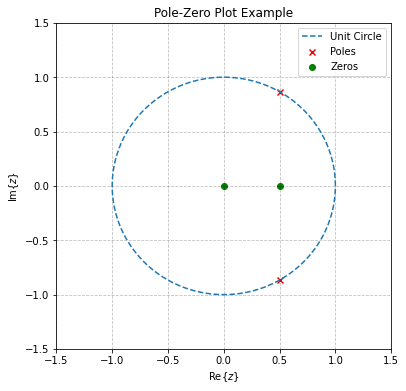

In [2]:
b = [1, -0.5, 0] #numerator coefficients, make sure to align zeros where delay terms don't align
a = [1, -1, 1] #denominator coefficients
z, p, _ = signal.tf2zpk(b, a) # _ is system gain -> ignore

print('Poles:',p)
print('Zeros:',z)
"""
pz_plot(zeros_list, poles_list, plot_title)
zeros_list -> list or array of transfer function's zeros
poles_list -> list or array of transfer function's poles
plot_title -> string for title of your plot
"""

pz_plot(z,p,'Pole-Zero Plot Example')

Next, we can find the impulse response of our system using $\textrm{signal.dimpulse()}$. There are a few ways to use this function and we will opt to use the system coefficients ($a$ and $b$).

Text(0.5, 1.0, 'Impulse Response of Example System')

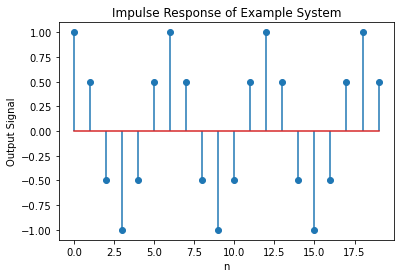

In [3]:
n,y = signal.dimpulse((b, a, 1),n=20) #the 1 is for the change in time per sample, n=20 means 20 points for output
h_n = y[0] #need to access output from returned object

plt.figure()
plt.stem(n, h_n) #plot first 20 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Example System')

## Exercise 1: Working with Transfer Functions

For each of the following transfer functions, plot the pole-zero plot and (stem plot) impulse response for the requested number of points using the previously discussed functions. Try to verify the poles and zeros you find and the resulting impulse response by hand. Explain why each system is BIBO stable or not. If the system is not BIBO stable, give an example of a bounded input that would yield and unbounded output.

$
\begin{align}
a. H_1(z) = \frac{1}{2} + \frac{1}{4}z^{-2} - \frac{1}{4}z^{-4}, \quad 0\leq n\leq 5
\end{align}
$

$
\begin{align}
b. H_2(z) = \frac{\frac{1}{2}z^2+\frac{1}{4}z}{z^2-\frac{\sqrt{2}}{2}z+\frac{1}{4}}, \quad 0\leq n\leq 20
\end{align}
$

$
\begin{align}
c. H_3(z) = \frac{z^3+z^2}{z^3-1}, \quad 0\leq n\leq 20
\end{align}
$

Text(0.5, 1.0, 'Impulse Response of H3 System')

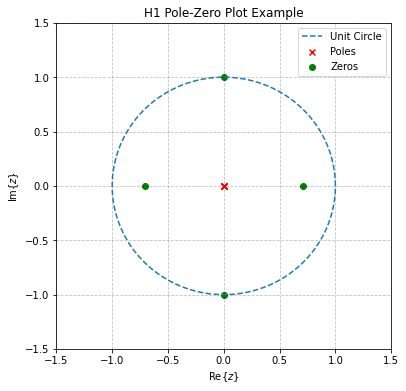

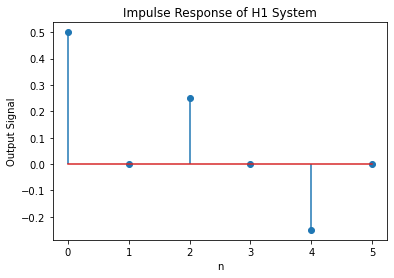

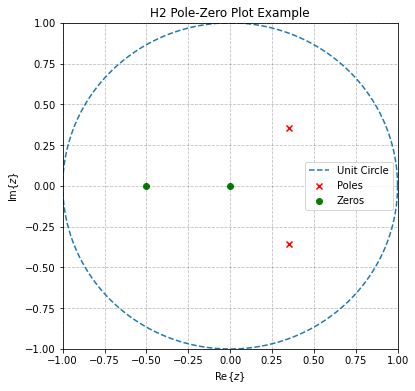

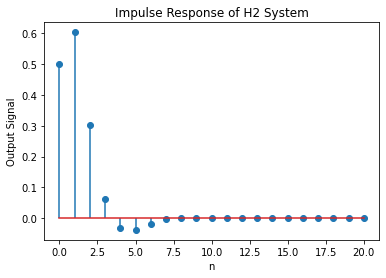

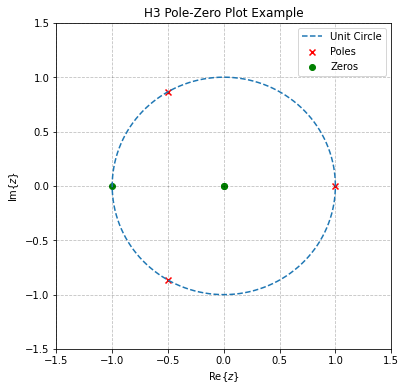

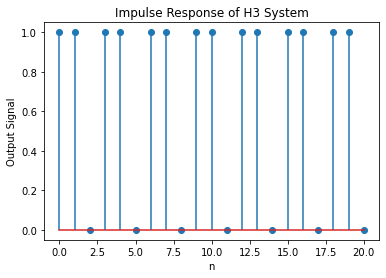

In [4]:
# Author: Xu Ke
# Date: 2022.02.16

#Code for 1.a
b_Ex1a = [2, 0, 1, 0, -1] #numerator coefficients, make sure to align zeros where delay terms don't align
a_Ex1a = [4, 0, 0, 0, 0] #denominator coefficients
z_Ex1a, p_Ex1a, _ = signal.tf2zpk(b_Ex1a, a_Ex1a) # _ is system gain -> ignore
#print('Poles:',p_Ex1a)
#print('Zeros:',z_Ex1a)
pz_plot(z_Ex1a,p_Ex1a,'H1 Pole-Zero Plot Example')

n_Ex1a,y_Ex1a = signal.dimpulse((b_Ex1a, a_Ex1a, 1),n=6) #the 1 is for the change in time per sample, n=6 means 6 points for output
h_n_Ex1a = y_Ex1a[0] #need to access output from returned object
plt.figure()
plt.stem(n_Ex1a, h_n_Ex1a) #plot first 6 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of H1 System')

#Code for 1.b

b_Ex1b = [1/2, 1/4, 0] #numerator coefficients, make sure to align zeros where delay terms don't align
a_Ex1b = [1, -np.sqrt(2)/2, 1/4] #denominator coefficients
z_Ex1b, p_Ex1b, _ = signal.tf2zpk(b_Ex1b, a_Ex1b) # _ is system gain -> ignore
#print('Poles:',p_Ex1b)
#print('Zeros:',z_Ex1b)
pz_plot(z_Ex1b,p_Ex1b,'H2 Pole-Zero Plot Example')

n_Ex1b,y_Ex1b = signal.dimpulse((b_Ex1b, a_Ex1b, 1),n=21) #the 1 is for the change in time per sample, n=21 means 21 points for output
h_n_Ex1b = y_Ex1b[0] #need to access output from returned object
plt.figure()
plt.stem(n_Ex1b, h_n_Ex1b) #plot first 21 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of H2 System')


#Code for 1.c

b_Ex1c = [1, 1, 0, 0] #numerator coefficients, make sure to align zeros where delay terms don't align
a_Ex1c = [1, 0, 0, -1] #denominator coefficients
z_Ex1c, p_Ex1c, _ = signal.tf2zpk(b_Ex1c, a_Ex1c) # _ is system gain -> ignore
#print('Poles:',p_Ex1c)
#print('Zeros:',z_Ex1c)
pz_plot(z_Ex1c,p_Ex1c,'H3 Pole-Zero Plot Example')

n_Ex1c,y_Ex1c = signal.dimpulse((b_Ex1c, a_Ex1c, 1),n=21) #the 1 is for the change in time per sample, n=21 means 21 points for output
h_n_Ex1c = y_Ex1c[0] #need to access output from returned object
plt.figure()
plt.stem(n_Ex1c, h_n_Ex1c) #plot first 21 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of H3 System')

From the textbook (Applied Digital Signal Processing Theory and Practice), we have conclusion that  __"A LTI system is stable if and only if the ROC of the system function H(z) includes the unit circle |z| = 1."__(Result 3.5.2) __"A causal LTI with a rational system function is stable if and only if all poles of H(z) are inside the unit circle in the z-plane. The zeros can be anywhere."__(Result 3.6.1)


Comments for 1.a: __BIBO stable__ since from the plot, it is obvious that the ROC in this case is z$\neq$0 which includes the unit circle |z| = 1 definitely.


1.b: __BIBO stable__ since this system is causal and all of the poles are within the unit circle.


1.c: __Not BIBO stable__ since all of the poles are on the unit circle and an obvious counter example will be the unit step function u[n].



## Exercise 2: Working from an LCCDE

For each of the following LCCDEs, determine the numerator and denominator coefficients, $a$ and $b$, respectively by hand. Using these coefficients, plot the pole-zero plot and impulse response for the requested number of points. Explain why each system is BIBO stable or not.

$\begin{align}
a. y_1[n] = x[n] - \frac{1}{2}x[n-1] + \frac{1}{4}x[n-2] - \frac{1}{8}x[n-3], \quad 0 \leq n \leq 5
\end{align}$

$\begin{align}
b.y_2[n] = y[n-1] - 2y[n-2] + y[n-3] + x[n] + \frac{1}{2}x[n-1], \quad 0\leq n \leq 20
\end{align}$

$\begin{align}
c. y_3[n] = \frac{1}{2}y[n-1] + \frac{1}{4}y[n-2] + \frac{1}{2}x[n] + \frac{1}{4}x[n-1], \quad 0\leq n \leq 20
\end{align}$

d. Is it possible for a finitely long system like the one in 2.a to not be BIBO stable? Why or why not?

Text(0.5, 1.0, 'Impulse Response of Third System')

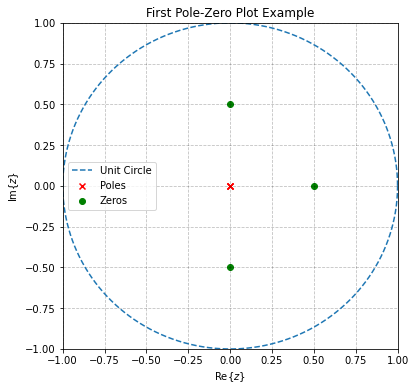

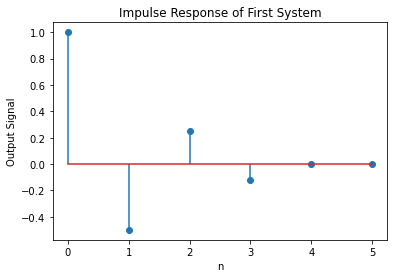

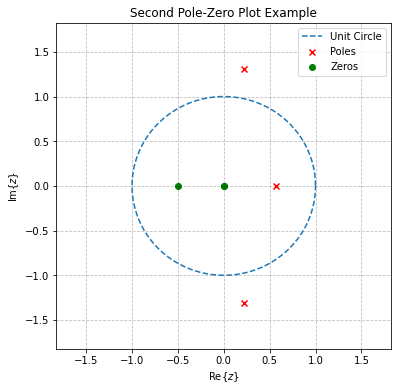

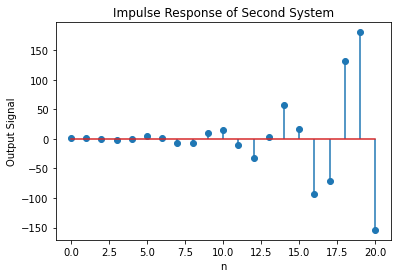

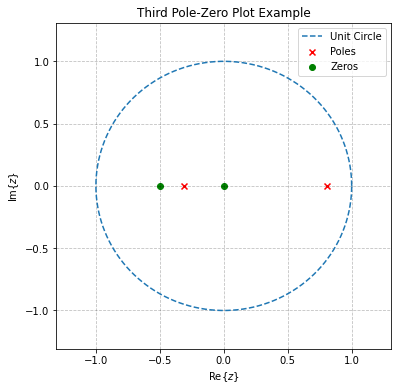

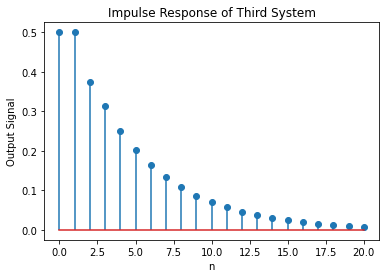

In [5]:
# Author: Xu Ke
# Date: 2022.02.16

#Code for 2.a
b_Ex2a = [1, -1/2, 1/4, -1/8] #numerator coefficients, make sure to align zeros where delay terms don't align
a_Ex2a = [1, 0, 0, 0] #denominator coefficients
z_Ex2a, p_Ex2a, _ = signal.tf2zpk(b_Ex2a, a_Ex2a) # _ is system gain -> ignore
#print('Poles:',p_Ex2a)
#print('Zeros:',z_Ex2a)
pz_plot(z_Ex2a,p_Ex2a,'First Pole-Zero Plot Example')

n_Ex2a,y_Ex2a = signal.dimpulse((b_Ex2a, a_Ex2a, 1),n=6) #the 1 is for the change in time per sample, n=6 means 6 points for output
h_n_Ex2a = y_Ex2a[0] #need to access output from returned object
plt.figure()
plt.stem(n_Ex2a, h_n_Ex2a) #plot first 6 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of First System')

#Code for 2.b

b_Ex2b = [1, 1/2, 0, 0] #numerator coefficients, make sure to align zeros where delay terms don't align
a_Ex2b = [1, -1, 2, -1] #denominator coefficients
z_Ex2b, p_Ex2b, _ = signal.tf2zpk(b_Ex2b, a_Ex2b) # _ is system gain -> ignore
#print('Poles:',p_Ex2b)
#print('Zeros:',z_Ex2b)
pz_plot(z_Ex2b,p_Ex2b,'Second Pole-Zero Plot Example')

n_Ex2b,y_Ex2b = signal.dimpulse((b_Ex2b, a_Ex2b, 1),n=21) #the 1 is for the change in time per sample, n=21 means 21 points for output
h_n_Ex2b = y_Ex2b[0] #need to access output from returned object
plt.figure()
plt.stem(n_Ex2b, h_n_Ex2b) #plot first 21 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Second System')


#Code for 2.c

b_Ex2c = [1/2, 1/4, 0] #numerator coefficients, make sure to align zeros where delay terms don't align
a_Ex2c = [1, -1/2, -1/4] #denominator coefficients
z_Ex2c, p_Ex2c, _ = signal.tf2zpk(b_Ex2c, a_Ex2c) # _ is system gain -> ignore
#print('Poles:',p_Ex2c)
#print('Zeros:',z_Ex2c)
pz_plot(z_Ex2c,p_Ex2c,'Third Pole-Zero Plot Example')

n_Ex2c,y_Ex2c = signal.dimpulse((b_Ex2c, a_Ex2c, 1),n=21) #the 1 is for the change in time per sample, n=21 means 21 points for output
h_n_Ex2c = y_Ex2c[0] #need to access output from returned object
plt.figure()
plt.stem(n_Ex2c, h_n_Ex2c) #plot first 21 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Third System')

From the textbook (Applied Digital Signal Processing Theory and Practice), we have conclusion that  __"A LTI system is stable if and only if the ROC of the system function H(z) includes the unit circle |z| = 1."__(Result 3.5.2) __"A causal LTI with a rational system function is stable if and only if all poles of H(z) are inside the unit circle in the z-plane. The zeros can be anywhere."__(Result 3.6.1)


Comments for 2.a: __BIBO stable__ since from the plot, it is obvious that the ROC in this case is z$\neq$0 which includes the unit circle |z| = 1 definitely.


2.b: __Not BIBO stable__ since the ROC doesn't contain the unit circle and some poles are outside of the unit circle.


2.c: __BIBO stable__ since the ROC contains the unit circle and all of the poles are inside the unit circle.


2.d: __No__ since for a finitely long system like the one in 2.a, no matter how many terms it has, it at most has multiple poles at zero, which will have no effect on the ROC it has now, thus the ROC will always include the unit circle, thus always stable.
    
    

## Exercise 3: Applying a Filter using Transfer Functions

So far, we have only characterized LSI systems. Now let's use them as filters! Using $\textrm{signal.lfilter(b,a,input)}$ apply each of the following filters to each of the inputs. Plot the resulting outputs for the same length as the provided input signals. You may find documentation for the filtering function <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html">here</a>.

$\begin{align}
a. H_1(z) = \frac{1}{2} - \frac{1}{2}z^{-1} + \frac{1}{2}z^{-2}
\end{align}$

$\begin{align}
b. y_2[n] = \frac{1}{2}y[n-1] + x[n] - x[n-2]
\end{align}$

$
\begin{align}
    \bullet~x_1[n] = \cos\left(\frac{\pi}{2}n\right), \quad 0 \leq n \leq 10
\end{align}
$

$
\begin{align}
    \bullet~x_2[n] = \left(\frac{1}{3}\right)^nu[n], \quad 0 \leq n \leq 10
\end{align}
$


Text(0.5, 1.0, 'Output Signal of x2 Filtered by System B')

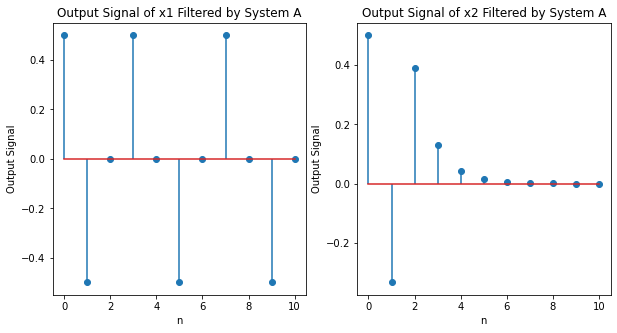

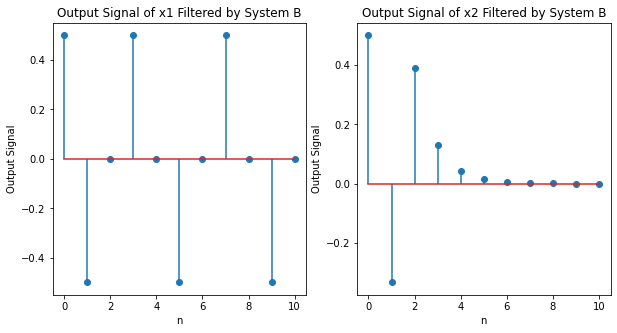

In [6]:
# Author: Xu Ke
# Date: 2022.02.16

x1_Ex3 = [np.cos(np.pi/2*i) for i in range(11)]
x2_Ex3 = [(1/3)**j for j in range(11)]

#Code for System A:
b_Asys = [1/2, -1/2, 1/2]
a_Asys = [1, 0, 0]

Filtered_x1_Asys = signal.lfilter(b_Asys, a_Asys, x1_Ex3)
Filtered_x2_Asys = signal.lfilter(b_Asys, a_Asys, x2_Ex3)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.stem(np.array(range(11)), Filtered_x1_Asys)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Output Signal of x1 Filtered by System A')
plt.subplot(122)
plt.stem(np.array(range(11)), Filtered_x2_Asys)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Output Signal of x2 Filtered by System A')

#Code for System B:
b_Bsys = [1, 0, -1]
a_Bsys = [1, -1/2, 0]

Filtered_x1_Bsys = signal.lfilter(b_Bsys, a_Bsys, x1_Ex3)
Filtered_x2_Bsys = signal.lfilter(b_Bsys, a_Bsys, x2_Ex3)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.stem(np.array(range(11)), Filtered_x1_Asys)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Output Signal of x1 Filtered by System B')
plt.subplot(122)
plt.stem(np.array(range(11)), Filtered_x2_Asys)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Output Signal of x2 Filtered by System B')

## Exercise 4: Marginal Stability

For this exercise, we will explore that "gray area" of stability from ECE 310: marginal stability. Recall that an LSI system is referred to as marginally stable if its ROC is $|z| > 1$. The following two LSI systems are marginally stable:

$\begin{align}
H_1(z) = \frac{z^2}{z^2 + 1},
\end{align}$

$\begin{align}
H_2(z) = \frac{z^2}{z^2 - \sqrt{2}z + 1}.
\end{align}$

a. Plot the pole-zero plot for both systems ($H_1(z)$ and $H_2(z)$).

Now, let's examine each system's response to some bounded inputs.

b. Plot the filtering output for each system for each of the following inputs. Remember to use $\textrm{signal.lfilter()}$ to obtain the system results. Please plot each system's set of outputs in one figure using $\textrm{plt.subplot()}$ and label your figures uniquely.

$
\begin{align}
    \bullet~x_1[n] = u[n], \quad 0 \leq n \leq 200
\end{align}
$

$
\begin{align}
    \bullet~x_2[n] = \cos\left({\frac{\pi}{2}n}\right), \quad 0 \leq n \leq 200
\end{align}
$

$
\begin{align}
    \bullet~x_3[n] = \cos\left({\frac{\pi}{4}n}\right), \quad 0 \leq n \leq 200
\end{align}
$

c. Comment on the results. Specifically, which inputs cause unbounded outputs for each system and why?

Text(0.5, 1.0, 'Output Signal of x3 Filtered by System H2')

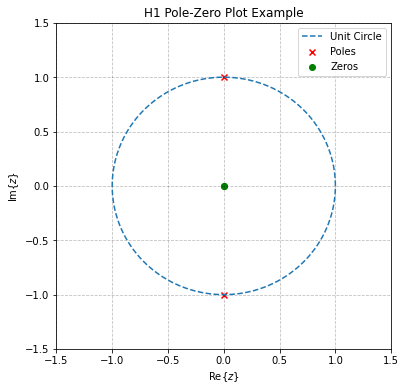

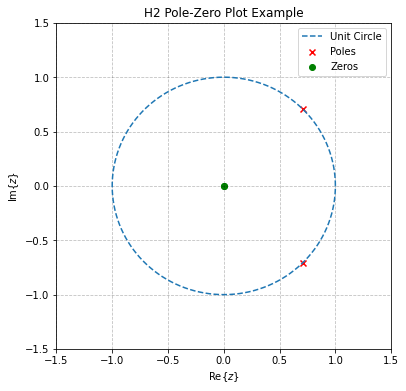

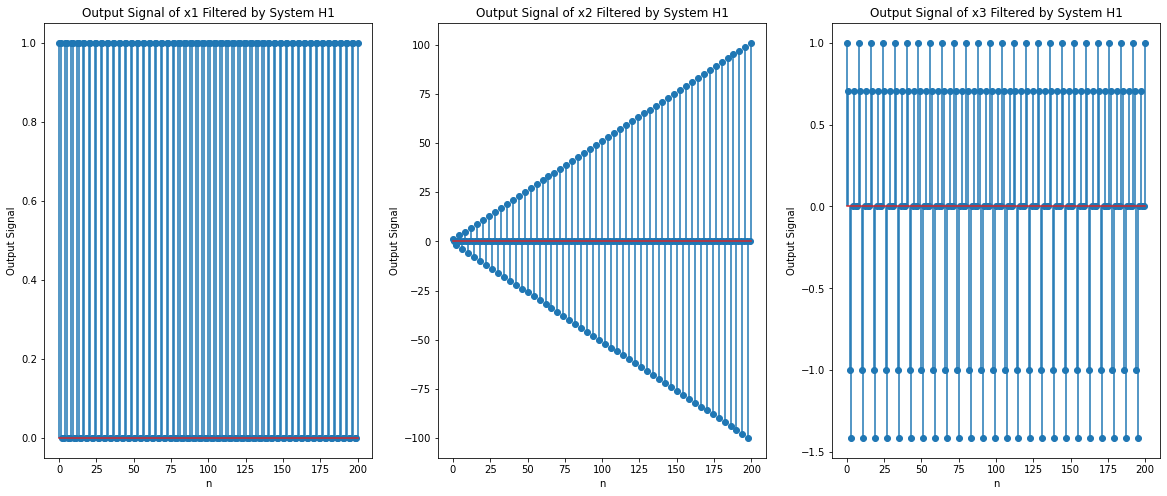

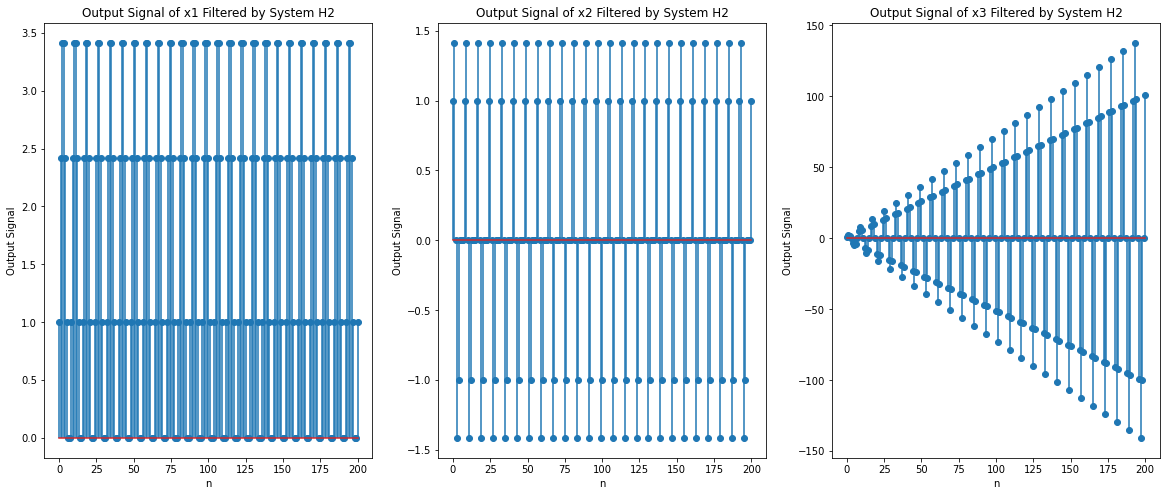

In [7]:
# Author: Xu Ke
# Date: 2022.02.16

#Code for 4.a:

b_H1 = [1, 0, 0] #numerator coefficients, make sure to align zeros where delay terms don't align
a_H1 = [1, 0, 1] #denominator coefficients
z_H1, p_H1, _ = signal.tf2zpk(b_H1, a_H1) # _ is system gain -> ignore
#print('Poles:',p_Ex1a)
#print('Zeros:',z_Ex1a)
pz_plot(z_H1,p_H1,'H1 Pole-Zero Plot Example')

b_H2 = [1, 0, 0] #numerator coefficients, make sure to align zeros where delay terms don't align
a_H2 = [1, -np.sqrt(2), 1] #denominator coefficients
z_H2, p_H2, _ = signal.tf2zpk(b_H2, a_H2) # _ is system gain -> ignore
#print('Poles:',p_Ex1a)
#print('Zeros:',z_Ex1a)
pz_plot(z_H2,p_H2,'H2 Pole-Zero Plot Example')

#Code for 4.b:
#Remember to use subplots!

x1_Ex4 = np.ones(201)
x2_Ex4 = [np.cos(np.pi/2*i) for i in range(201)]
x3_Ex4 = [np.cos(np.pi/4*i) for i in range(201)]

Filtered_x1_H1 = signal.lfilter(b_H1, a_H1, x1_Ex4)
Filtered_x2_H1 = signal.lfilter(b_H1, a_H1, x2_Ex4)
Filtered_x3_H1 = signal.lfilter(b_H1, a_H1, x3_Ex4)

plt.figure(figsize=(20,8))
plt.subplot(131)
plt.stem(np.array(range(201)), Filtered_x1_H1)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Output Signal of x1 Filtered by System H1')
plt.subplot(132)
plt.stem(np.array(range(201)), Filtered_x2_H1)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Output Signal of x2 Filtered by System H1')
plt.subplot(133)
plt.stem(np.array(range(201)), Filtered_x3_H1)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Output Signal of x3 Filtered by System H1')


Filtered_x1_H2 = signal.lfilter(b_H2, a_H2, x1_Ex4)
Filtered_x2_H2 = signal.lfilter(b_H2, a_H2, x2_Ex4)
Filtered_x3_H2 = signal.lfilter(b_H2, a_H2, x3_Ex4)

plt.figure(figsize=(20,8))
plt.subplot(131)
plt.stem(np.array(range(201)), Filtered_x1_H2)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Output Signal of x1 Filtered by System H2')
plt.subplot(132)
plt.stem(np.array(range(201)), Filtered_x2_H2)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Output Signal of x2 Filtered by System H2')
plt.subplot(133)
plt.stem(np.array(range(201)), Filtered_x3_H2)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Output Signal of x3 Filtered by System H2')

Answer for 4.c: Input 2 $x_2[n] = \cos\left({\frac{\pi}{2}n}\right)$ causes unbounded output for system 1 $\begin{align}H_1(z) = \frac{z^2}{z^2 + 1}\end{align}$ since the poles of cosine input signal matches with the poles of the system, then the output continue to add without boundary.

Input 3 $x_3[n] = \cos\left({\frac{\pi}{4}n}\right)$ causes unbounded output for system 2 $\begin{align}H_2(z) = \frac{z^2}{z^2 - \sqrt{2}z + 1}.\end{align}$ also since the poles of cosine input signal matches with the poles of the system, then the output continue to add without boundary.



## Exercise 5: Inverse Filtering

Suppose we are transmitting audio through a low-quality channel modeled by the following system

$$
y[n] = -y[n-1] - \frac{1}{4}y[n-2] + 2x[n] - 2x[n-2],
$$

where $x$ is our input and $y$ is the channel output. The provided audioclip ``distorted-audio.wav`` is an example of audio corrupted by this channel. If we would like to correct this signal, we need to undo the effects of the channel. Note that the received signal $y[n]$ has a z-transform of

$$
Y(z) = H(z)X(z),
$$

where $H(z)$ is the transfer function of the channel. How can we fix our audio? Apply a filter that is the inverse of the problematic channel! So, what are you waiting for? Go save the day!

a. Determine the transfer function of the required inverse filter and apply it to the ``distorted-audio.wav`` file data. Play the resulting audio using $\textrm{Audio(data=audio_data, rate=fs)}$ like in Lab 1. Does the recovered signal sounds like the original? **Remember to be careful with the volume and be mindful of others around you as you test your code!**

b. Describe the qualitative differences between the original and distorted audio clips.

c. What is the relationship between the poles and zeros of the noisy channel and its inverse filter?

In [8]:
fs, clean = wavfile.read('clean-audio.wav') #reference for what the clean audio sounds like
fs, distorted = wavfile.read('distorted-audio.wav') #distorted audio signal
print(clean.shape) #shape of audio clip numpy arrays, only one channel for these clips
print(distorted.shape)

(132400,)
(132400,)


In [9]:
Audio(data=clean, rate=fs) #listen to clean audio, use headphones and start at low volume!

In [10]:
Audio(data=distorted, rate=fs) #listen to distorted version

In [11]:
# Author: Xu Ke
# Date: 2022.02.16

#Code for 5.a:
#create inverse filter
b_Ex5 = [2, 0, -2]
a_Ex5 = [1, 1, 1/4]

#apply filter to distorted audio, store in variable named "result"
result = signal.lfilter(b_Ex5,a_Ex5,distorted)
result = result.astype(np.int16) #typecast to appropriate data type, this helps the audio better match what we expect

In [12]:
Audio(data=result, rate=fs) #listen to your result!

Answer for 5.b: The original one is much louder and has more clear music while the distorted one is much lighter and has more clear the sound of strings plucking.


Answer for 5.c: I think the poles of noisy channel will become the zeros of inverse fillter and the zeros of noisy channel will become the poles of inverse fillter.